### `01: Learning the digits`
You're going to build a model on the digits dataset, a sample dataset that comes pre-loaded with scikit learn. The digits dataset consist of 8x8 pixel handwritten digits from 0 to 9:

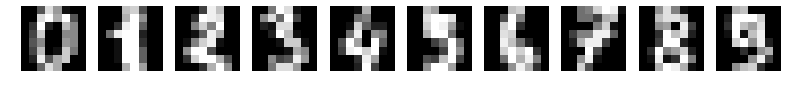

You want to distinguish between each of the 10 possible digits given an image, so we are dealing with multi-class classification.
The dataset has already been partitioned into X_train, y_train, X_test, and y_test, using 30% of the data as testing data. The labels are already one-hot encoded vectors, so you don't need to use Keras to_categorical() function.

Let's build this new model!

- Add a `Dense` layer of 16 neurons with `relu` activation and an `input_shape` that takes the total number of pixels of the 8x8 digit image.
- Add a `Dense` layer with 10 outputs and `softmax` activation.
- Compile your model with `adam`, `categorical_crossentropy`, and `accuracy` metrics.
- Make sure your model works by predicting on `X_train`.

In [1]:
import numpy as np 
import pandas as pd 
# Import the sequential model and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


X_train = np.load("datasets/X_train_digits.npy")
X_test = np.load("datasets/X_test_digits.npy")
y_train = np.load("datasets/y_train_digits.npy")
y_test = np.load("datasets/y_test_digits.npy")

In [2]:
# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10, activation='softmax'))

# Compile your model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_train))

40/40 [==============================] - 0s 1ms/step
[[2.3695520e-05 1.7819611e-03 1.3078113e-01 ... 4.8272113e-14
  1.2715829e-05 2.6932003e-08]
 [4.2544940e-04 5.9255969e-04 3.8533032e-01 ... 3.6166921e-18
  3.4104187e-02 1.2863345e-13]
 [8.4773380e-01 4.0244921e-10 6.4580835e-04 ... 3.2286671e-10
  6.6947070e-04 6.5759679e-08]
 ...
 [9.2564890e-04 4.4837284e-10 8.9987052e-06 ... 2.2305413e-08
  2.7080590e-03 2.3400853e-08]
 [2.4046199e-06 8.3173816e-13 2.2932857e-08 ... 2.5161627e-14
  2.0161092e-07 1.5677574e-17]
 [5.1129005e-06 3.3676038e-06 1.8158236e-04 ... 8.2049851e-13
  1.7921287e-06 3.1384878e-10]]


Great! Predicting on training data inputs before training can help you quickly check that your model works as expected.

### `02: Is the model overfitting?`

Let's train the model you just built and plot its learning curve to check out if it's overfitting! You can make use of the loaded function plot_loss() to plot training loss against validation loss, you can get both from the history callback.

If you want to inspect the plot_loss() function code, paste this in the console: show_code(plot_loss)

- Train your model for 60 `epochs`, using `X_test` and `y_test` as validation data.
- Use `plot_loss()` passing `loss` and `val_loss` as extracted from the history attribute of the `h_callback` object.

In [3]:
import matplotlib.pyplot as plt 
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

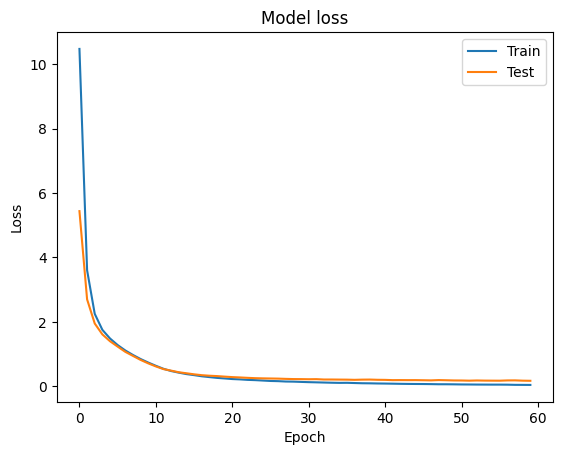

In [4]:
# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train,y_train, epochs = 60, validation_data = (X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

Question
Just by looking at the picture, do you think the learning curve shows this model is overfitting after having trained for 60 epochs?

- Yes, it started to overfit since the test loss is higher than the training loss.
- No, the test loss is not getting higher as the epochs go by. ✅
 

Awesome choice! This graph doesn't show overfitting but convergence. It looks like your model has learned all it could from the data and it no longer improves. The test loss, although higher than the training loss, is not getting worse, so we aren't overfitting to the training data.



### `03: Do we need more data?`
It's time to check whether the digits dataset model you built benefits from more training examples!

In order to keep code to a minimum, various things are already initialized and ready to use:

The model you just built.
X_train,y_train,X_test, and y_test.
The initial_weights of your model, saved after using model.get_weights().
A pre-defined list of training sizes: training_sizes.
A pre-defined early stopping callback monitoring loss: early_stop.
Two empty lists to store the evaluation results: train_accs and test_accs.
Train your model on the different training sizes and evaluate the results on X_test. End by plotting the results with plot_results().

The full code for this exercise can be found on the slides!


- Get a fraction of the training data determined by the `size` we are currently evaluating in the loop.
- Set the model weights to the `initial_weights` with `set_weights()` and train your model on the fraction of training data using `early_stop` as a callback.
- Evaluate and store the accuracy for the training fraction and the test set.
- Call `plot_results()` passing in the training and test accuracies for each training size.

In [5]:
training_sizes = np.array([ 125,  502,  879, 1255])

def plot_results(train_accs,test_accs):
  plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
  plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
  plt.title('Accuracy vs Number of training samples')
  plt.xlabel('# of training samples')
  plt.ylabel('Accuracy')
  plt.legend(loc="best")
  plt.show()

In [6]:
import pickle
with open('datasets/initial_weights.pkl', 'rb') as file:
    initial_weights = pickle.load(file)

from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=1, monitor='loss')



Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 8.6902 - accuracy: 0.1840
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 5.5261 - accuracy: 0.1600
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 4.0750 - accuracy: 0.1920
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 2.9438 - accuracy: 0.2560
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 2.4199 - accuracy: 0.3600
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.9277 - accuracy: 0.4240
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.7377 - accuracy: 0.4640
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.5463 - accuracy: 0.4640
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 1.4158 - accuracy: 0.5040
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 1.2998 - accuracy: 0.5360
Epoch 11/50
4/4 [======================

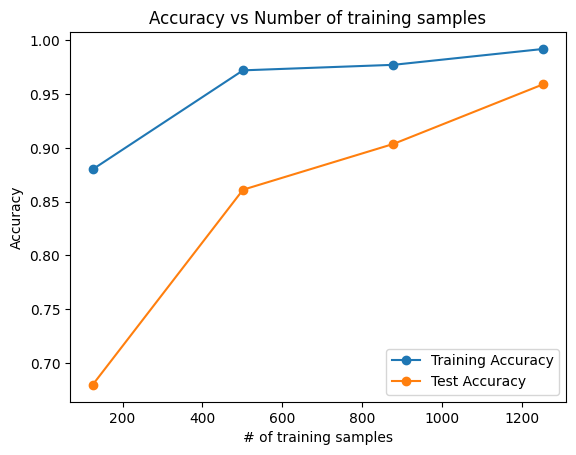

In [7]:
train_accs=[]
test_accs=[]
for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    
# Plot train vs test accuracies
plot_results(train_accs, test_accs)

Good job, that was a lot of code to understand! The results shows that your model would not benefit a lot from more training data, since the test set accuracy is already starting to flatten. It's time to look at activation funtions!



### `04: Different activation functions`
The sigmoid(),tanh(), ReLU(), and leaky_ReLU() functions have been defined and ready for you to use. Each function receives an input number X and returns its corresponding Y value.

Which of the statements below is false?

- the sigmoid() takes a value of 0.5 when X=0 whilst tanh() takes a value of 0. 
- the leaky_ReLU() takes a value of -0.01 when X=-1 whilst ReLU() takes a value of 0.
- the sigmoid() and tanh() both take values close to -1 for big negative number. ✅

Great! For big negative numbers the sigmoid approaches _0_ not _-1_ whilst the tanh() does take values close to _-1_.



In [8]:
X_train = np.load("datasets/X_train_V3.npy")
X_test = np.load("datasets/X_test_V3.npy")
y_train = np.load("datasets/y_train_V3.npy")
y_test = np.load("datasets/y_test_V3.npy")
X_train.shape

(1400, 20)

In [9]:
def get_model(act_function):
  if act_function not in ['relu', 'leaky_relu', 'sigmoid', 'tanh']:
    raise ValueError('Make sure your activation functions are named correctly!')
  print("Finishing with",act_function,"...")
  return ModelWrapper(act_function)

def ModelWrapper(act_function):
  model = Sequential()
  model.add(Dense(30, activation=act_function, input_shape=(20,)))
  # Output layer with 10 neurons (one per digit) and softmax
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

  return model 




In [10]:
# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model and store the history results
  h_callback = model.fit(X_train, y_train, 
                        validation_data=(X_test,y_test),
                        epochs=20,
                        verbose=0)
  activation_results[act] = h_callback

Finishing with relu ...
Finishing with leaky_relu ...
Finishing with sigmoid ...
Finishing with tanh ...


### `05: Comparing activation functions II`
What you coded in the previous exercise has been executed to obtain theactivation_results variable, this time 100 epochs were used instead of 20. This way you will have more epochs to further compare how the training evolves per activation function.

For every h_callback of each activation function in activation_results:

The h_callback.history['val_loss'] has been extracted.
The h_callback.history['val_accuracy'] has been extracted.
Both are saved into two dictionaries: val_loss_per_function and val_acc_per_function.

Pandas is also loaded as pd for you to use. Let's plot some quick validation loss and accuracy charts!

- Use `pd.DataFrame()`to create a new DataFrame from the `val_loss_per_function` dictionary.
- Call `plot()` on the DataFrame.
- Create another pandas DataFrame from `val_acc_per_function`.
- Once again, plot the DataFrame.

In [11]:
import pickle
with open('datasets/val_loss_per_function.pkl', 'rb') as file:
    val_loss_per_function = pickle.load(file)

with open('datasets/val_acc_per_function.pkl', 'rb') as file:
    val_acc_per_function = pickle.load(file)

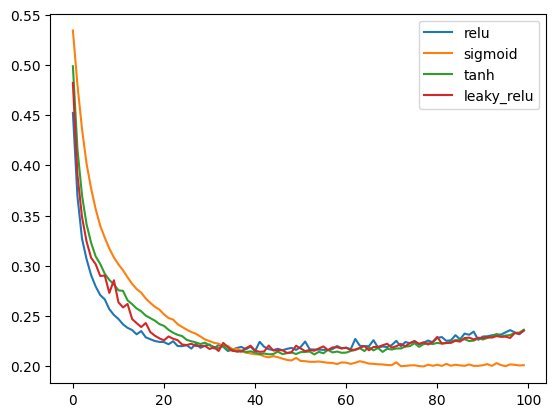

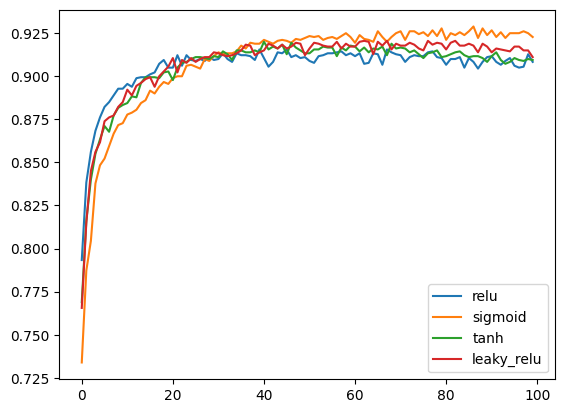

In [12]:
# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot()
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot()
plt.show()

You've plotted both: loss and accuracy curves. It looks like sigmoid activation worked best for this particular model as the hidden layer's activation function. It led to a model with lower validation loss and higher accuracy after 100 epochs.



### `06: Changing batch sizes`

You've seen models are usually trained in batches of a fixed size. The smaller a batch size, the more weight updates per epoch, but at a cost of a more unstable gradient descent. Specially if the batch size is too small and it's not representative of the entire training set.

Let's see how different batch sizes affect the accuracy of a simple binary classification model that separates red from blue dots.

You'll use a batch size of one, updating the weights once per sample in your training set for each epoch. Then you will use the entire dataset, updating the weights only once per epoch.

- Use `get_model()` to get a new, already compiled, model, then train your model for 5 `epochs` with a `batch_size` of 1.
- Now train a new model with `batch_size` equal to the size of the training set.





In [13]:
X_train = np.load("datasets/X_train_V4.npy")
X_test = np.load("datasets/X_test_V4.npy")
y_train = np.load("datasets/y_train_V4.npy")
y_test = np.load("datasets/y_test_V4.npy")

In [19]:
def get_model():
  model = Sequential()
  model.add(Dense(4,input_shape=(2,),activation='relu'))
  model.add(Dense(1,activation="sigmoid"))
  model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
  return model

In [20]:
# Get a fresh new model with get_model
model = get_model()

# Train your model for 5 epochs with a batch size of 1
model.fit(X_train, y_train, epochs=5, batch_size=1)
print("\n The accuracy when using a batch of size 1 is: ",
      model.evaluate(X_test, y_test)[1])

Epoch 1/5
700/700 [==============================] - 2s 2ms/step - loss: 0.6962 - accuracy: 0.5800
Epoch 2/5
700/700 [==============================] - 1s 2ms/step - loss: 0.6084 - accuracy: 0.8071
Epoch 3/5
700/700 [==============================] - 1s 2ms/step - loss: 0.5505 - accuracy: 0.8386
Epoch 4/5
700/700 [==============================] - 1s 2ms/step - loss: 0.4925 - accuracy: 0.8543
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8933

 The accuracy when using a batch of size 1 is:  0.8933333158493042


In [21]:
model = get_model()

# Fit your model for 5 epochs with a batch of size the training set
model.fit(X_train, y_train, epochs=5, batch_size=700)
print("\n The accuracy when using the whole training set as batch-size was: ",
      model.evaluate(X_test, y_test)[1])

Epoch 1/5
1/1 [==============================] - 0s 215ms/step - loss: 0.6872 - accuracy: 0.4843
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.4857
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.4871
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.4871
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5367

 The accuracy when using the whole training set as batch-size was:  0.5366666913032532


Great work! You can see that accuracy is lower when using a batch size equal to the training set size. This is not because the network had more trouble learning the optimization function: Even though the same number of epochs were used for both batch sizes the number of resulting weight updates was very different!. With a batch of size the training set and 5 epochs we only get 5 updates total, each update computes and averaged gradient descent with all the training set observations. To obtain similar results with this batch size we should increase the number of epochs so that more weight updates take place.



### `07: Batch normalizing a familiar model`
Remember the digits dataset you trained in the first exercise of this chapter?

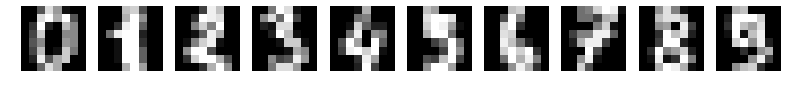

A multi-class classification problem that you solved using softmax and 10 neurons in your output layer.

You will now build a new deeper model consisting of 3 hidden layers of 50 neurons each, using batch normalization in between layers. The kernel_initializer parameter is used to initialize weights in a similar way.


- Import `BatchNormalization` from `tensorflow.keras` layers.
- Build your deep network model, use 50 neurons for each hidden layer adding batch normalization in between layers.
- Compile your model with stochastic gradient descent, `sgd`, as an optimizer.

In [22]:
# Import batch normalization from keras layers
from tensorflow.keras.layers import BatchNormalization

# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50 , activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50 , activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Congratulations! That was a deep model indeed. Let's compare how it performs against this very same model without batch normalization!



### `08: Batch normalization effects`

Batch normalization tends to increase the learning speed of our models and make their learning curves more stable. Let's see how two identical models with and without batch normalization compare.

The model you just built batchnorm_model is loaded for you to use. An exact copy of it without batch normalization: standard_model, is available as well. You can check their summary() in the console. X_train, y_train, X_test, and y_test are also loaded so that you can train both models.

You will compare the accuracy learning curves for both models plotting them with compare_histories_acc().

You can check the function pasting show_code(compare_histories_acc) in the console.


- Train the `standard_model` for 10 epochs passing in train and validation data, storing its history in `h1_callback`.
- Train your `batchnorm_model` for 10 epochs passing in train and validation data, storing its history in `h2_callback`.
- Call `compare_histories_acc` passing in `h1_callback` and `h2_callback`.

In [23]:
X_train = np.load("datasets/X_train_digits.npy")
X_test = np.load("datasets/X_test_digits.npy")
y_train = np.load("datasets/y_train_digits.npy")
y_test = np.load("datasets/y_test_digits.npy")

In [24]:
standard_model = Sequential()
standard_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50 , activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50 , activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
standard_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(standard_model.summary())
print(50*"***")
print(batchnorm_model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                3250      
                                                                 
 dense_25 (Dense)            (None, 50)                2550      
                                                                 
 dense_26 (Dense)            (None, 50)                2550      
                                                                 
 dense_27 (Dense)            (None, 10)                510       
                                                                 
Total params: 8,860
Trainable params: 8,860
Non-trainable params: 0
_________________________________________________________________
None
******************************************************************************************************************************************************
Model: "sequential_10"
____

In [25]:
def compare_histories_acc(h1,h2):
  plt.plot(h1.history['accuracy'])
  plt.plot(h1.history['val_accuracy'])
  plt.plot(h2.history['accuracy'])
  plt.plot(h2.history['val_accuracy'])
  plt.title("Batch Normalization Effects")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
  plt.show()

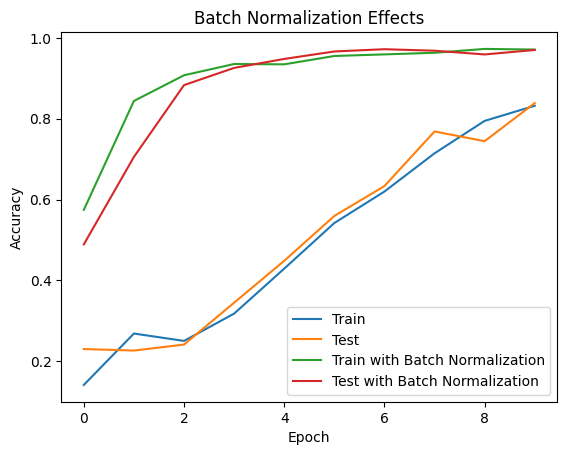

In [26]:
# Train your standard model, storing its history callback
h1_callback = standard_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, verbose=0)

# Train the batch normalized model you recently built, store its history callback
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

# Call compare_histories_acc passing in both model histories
compare_histories_acc(h1_callback, h2_callback)

Outstanding! You can see that for this deep model batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs.

### `09: Preparing a model for tuning`

Let's tune the hyperparameters of a binary classification model that does well classifying the breast cancer dataset.

You've seen that the first step to turn a model into a sklearn estimator is to build a function that creates it. The definition of this function is important since hyperparameter tuning is carried out by varying the arguments your function receives.

Build a simple create_model() function that receives both a learning rate and an activation function as arguments. The Adam optimizer has been imported as an object from tensorflow.keras.optimizers so that you can also change its learning rate parameter.

- Set the learning rate of the `Adam` optimizer object to the one passed in the arguments.
- Set the hidden layers activations to the one passed in the arguments.
- Pass the optimizer and the binary cross-entropy loss to the `.compile()` method.

In [27]:
from tensorflow.keras.optimizers import Adam

In [28]:
# Creates a model given an activation and learning rate
def create_model(learning_rate, activation):
  
  	# Create an Adam optimizer with the given learning rate
  	opt = Adam(lr = learning_rate)
  	
  	# Create your binary classification model  
  	model = Sequential()
  	model.add(Dense(128, input_shape = (30,), activation = activation))
  	model.add(Dense(256, activation = activation))
  	model.add(Dense(1, activation = 'sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
  	return model

Well done! With this function ready you can now create a sklearn estimator and generate different models to perform simple hyperparameter tuning on!


### `10: Tuning the model parameters`
It's time to try out different parameters on your model and see how well it performs!

The create_model() function you built in the previous exercise is ready for you to use.

Since fitting the RandomizedSearchCV object would take too long, the results you'd get are printed in the show_results() function. You could try random_search.fit(X,y) in the console yourself to check it does work after you have built everything else, but you will probably timeout the exercise (so copy your code first if you try this or you can lose your progress!).

You don't need to use the optional epochs and batch_size parameters when building your KerasClassifier object since you are passing them as params to the random search and this works already.

- Import `KerasClassifier` from `tensorflow.keras` scikit_learn wrappers.
- Use your `create_model` function when instantiating your `KerasClassifier`.
- Set `'relu'` and `'tanh'` as `activation`, 32, 128, and 256 as `batch_size`, 50, 100, and 200 `epochs`, and `learning_rate` of 0.1, 0.01, and 0.001.
- Pass your converted `model` and the chosen `params` as you build your `RandomizedSearchCV` object.

In [29]:
def show_results():
  print("Best: \n0.975395 using {learning_rate: 0.001, epochs: 50, batch_size: 128, activation: relu} \nOther: \n0.956063 (0.013236) with: {learning_rate: 0.1, epochs: 200, batch_size: 32, activation: tanh} \n0.970123 (0.019838) with: {learning_rate: 0.1, epochs: 50, batch_size: 256, activation: tanh} \n0.971880 (0.006524) with: {learning_rate: 0.01, epochs: 100, batch_size: 128, activation: tanh} \n0.724077 (0.072993) with: {learning_rate: 0.1, epochs: 50, batch_size: 32, activation: relu} \n0.588752 (0.281793) with: {learning_rate: 0.1, epochs: 100, batch_size: 256, activation: relu} \n0.966608 (0.004892) with: {learning_rate: 0.001, epochs: 100, batch_size: 128, activation: tanh} \n0.952548 (0.019734) with: {learning_rate: 0.1, epochs: 50, batch_size: 256, activation: relu} \n0.971880 (0.006524) with: {learning_rate: 0.001, epochs: 200, batch_size: 128, activation: relu}\n0.968366 (0.004239) with: {learning_rate: 0.01, epochs: 100, batch_size: 32, activation: relu}\n0.910369 (0.055824) with: {learning_rate: 0.1, epochs: 100, batch_size: 128, activation: relu}")

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold


In [31]:
X = np.load("datasets/X.npy")
y = np.load("datasets/y.npy")

In [32]:
# Import KerasClassifier from tensorflow.keras scikit learn wrappers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [32, 128, 256], 
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Running random_search.fit(X,y) would start the search,but it takes too long! 
show_results()

Best: 
0.975395 using {learning_rate: 0.001, epochs: 50, batch_size: 128, activation: relu} 
Other: 
0.956063 (0.013236) with: {learning_rate: 0.1, epochs: 200, batch_size: 32, activation: tanh} 
0.970123 (0.019838) with: {learning_rate: 0.1, epochs: 50, batch_size: 256, activation: tanh} 
0.971880 (0.006524) with: {learning_rate: 0.01, epochs: 100, batch_size: 128, activation: tanh} 
0.724077 (0.072993) with: {learning_rate: 0.1, epochs: 50, batch_size: 32, activation: relu} 
0.588752 (0.281793) with: {learning_rate: 0.1, epochs: 100, batch_size: 256, activation: relu} 
0.966608 (0.004892) with: {learning_rate: 0.001, epochs: 100, batch_size: 128, activation: tanh} 
0.952548 (0.019734) with: {learning_rate: 0.1, epochs: 50, batch_size: 256, activation: relu} 
0.971880 (0.006524) with: {learning_rate: 0.001, epochs: 200, batch_size: 128, activation: relu}
0.968366 (0.004239) with: {learning_rate: 0.01, epochs: 100, batch_size: 32, activation: relu}
0.910369 (0.055824) with: {learning_r

C:\Users\ai_mo\AppData\Local\Temp\ipykernel_10184\3633069683.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model)


In [ ]:
# random_search.fit(X,y)

### `11: Training with cross-validation`
Time to train your model with the best parameters found: 0.001 for the learning rate, 50 epochs, a 128 batch_size and relu activations.

The create_model() function from the previous exercise is ready for you to use. X and y are loaded as features and labels.

Use the best values found for your model when creating your KerasClassifier object so that they are used when performing cross_validation.

End this chapter by training an awesome tuned model on the breast cancer dataset!


- Import `KerasClassifier` from `tensorflow.keras` scikit_learn wrappers.
- Create a `KerasClassifier` object providing the best parameters found.
- Pass your `model`, features and labels to `cross_val_score` to perform cross-validation with 3 folds.

In [33]:
def create_model(learning_rate = 0.001, activation = 'relu'):
  opt = Adam(lr = learning_rate)
  model = Sequential()
  model.add(Dense(128,input_shape = (30,),activation = activation))
  model.add(Dense(256,activation = activation))
  model.add(Dense(1,activation = 'sigmoid'))
  model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])
  return model

In [34]:
# Import KerasClassifier from tensorflow.keras wrappers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model(learning_rate = 0.001 , activation = 'relu'), epochs = 50, batch_size = 128 , verbose = 0)

# Calculate the accuracy score for each fold
#kfolds = cross_val_score(model, X, y, cv = 3)

# Print the mean accuracy
#print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
#print('With a standard deviation of:', kfolds.std())

c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ai_mo\AppData\Local\Temp\ipykernel_10184\2154879001.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model(learning_rate = 0.001 , activation = 'relu'), epochs = 50, batch_size = 128 , verbose = 0)



Amazing! You can now test out different parameters on your networks and find the best models. Congratulations on making it this far, this chapter was quite a challengue! You're now left with a final chapter full of fun models to play with.

